In [1]:
import numpy as np 
import pandas as pd 
import os
from PIL import Image
folder_path = "C:\\Users\\ADMIN\\Satellite Image Processing\\Dataset"
files_in_folder = os.listdir(folder_path)
datasets ={}
for file_name in files_in_folder:
    if file_name.endswith(".jpg"):
        file_path = os.path.join(folder_path,file_name)
        img = Image.open(file_path)
        image_data[file_name] =img

In [2]:
try:
    import PIL
    print("PIL module loaded successfully.")
except ImportError:
    print("PIL module could not be loaded.")

PIL module loaded successfully.


In [3]:
from PIL import Image

file_path = "C:\\Users\\ADMIN\\Satellite Image Processing\\Dataset\\Tile1\\images\\image_part_001.jpg"

try:
    with Image.open(file_path) as img:
        print("Image loaded successfully.")
except FileNotFoundError:
    print("Image file not found.")
except IOError:
    print("Error opening the image.")


Image loaded successfully.


In [4]:
!pip install patchify

In [5]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [6]:
dataset_root_folder = "C:\\Users\\ADMIN\\Satellite Image Processing\\Dataset"

In [7]:
for path, subdirs, files in os.walk(dataset_root_folder):
    dir_name = path.split(os.path.sep)[-1]
    #print(dir_name)
    if dir_name == 'masks':
        images = os.listdir(path)
        print(path)
        # print(images)
        for i, image_name in enumerate(images):
            if image_name.endswith('.png'):
                #print(image_name)
                a = True

C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile1\masks
C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile2\masks
C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile3\masks
C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile4\masks
C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile5\masks
C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile6\masks
C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile7\masks
C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile8\masks


In [8]:
image_patch_size= 256

In [9]:
image= cv2.imread(f'C:\\Users\\ADMIN\\Satellite Image Processing\\Dataset\\Tile1\\images\\image_part_001.jpg',1)

In [10]:
image_patches = patchify(image,(image_patch_size,image_patch_size,3),step= image_patch_size)

In [11]:
len(image_patches)

2

In [12]:
print(image_patches.shape)

(2, 3, 1, 256, 256, 3)


In [13]:
#MinMaxScaler
minmaxscaler = MinMaxScaler()

In [14]:
image_x = image_patches[0,0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)
image_y[0].shape

(256, 256, 3)

In [15]:
print(type(image))

<class 'numpy.ndarray'>


In [16]:
type(Image.fromarray(image))

PIL.Image.Image

In [17]:
image.shape

(644, 797, 3)

In [18]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [19]:
image_dataset = []
mask_dataset = []



for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
    
        
  for tile_id in range(1,8):
    for image_id in range(1,10):
        dataset_dir = 'C:\\Users\\ADMIN\\Satellite Image Processing\\Dataset'

        # Construct the file path C:\\Users\\muj\\Satellite Image\\Dataset\\Tile1\\images\\image_part_001.jpg
        file_path = f"{dataset_dir}\\Tile{tile_id}\\{image_type}\\image_part_00{image_id}.{image_extension}"
        print("Processing:", file_path)
        # Read the image using OpenCV
        image = cv2.imread(file_path, 1) 
        
        if image is not None:
            print("Image loaded successfully.")
            
            if image_type == 'masks':
              image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            #print(image.shape)
            size_x = (image.shape[1]//image_patch_size)*image_patch_size
            size_y = (image.shape[0]//image_patch_size)*image_patch_size
            #print("{} --- {} - {}".format(image.shape, size_x, size_y))
            image = Image.fromarray(image)
            image = image.crop((0,0, size_x, size_y))
            #print("({},  {})".format(image.size[0],image.size[1]))
            image = np.array(image)
            patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
            #print(len(patched_images))
            for i in range(patched_images.shape[0]):
              for j in range(patched_images.shape[1]):
                if image_type == 'images':
                  individual_patched_image = patched_images[i,j,:,:]
                  #print(individual_patched_image.shape)
                  individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                  individual_patched_image = individual_patched_image[0]
                  #print(individual_patched_image.shape)
                  image_dataset.append(individual_patched_image)
                elif image_type == 'masks':
                  individual_patched_mask = patched_images[i,j,:,:]
                  individual_patched_mask = individual_patched_mask[0]
                  mask_dataset.append(individual_patched_mask)
        else:
            print("Failed to load image")

Processing: C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile1\images\image_part_001.jpg
Image loaded successfully.
Processing: C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile1\images\image_part_002.jpg
Image loaded successfully.
Processing: C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile1\images\image_part_003.jpg
Image loaded successfully.
Processing: C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile1\images\image_part_004.jpg
Image loaded successfully.
Processing: C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile1\images\image_part_005.jpg
Image loaded successfully.
Processing: C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile1\images\image_part_006.jpg
Image loaded successfully.
Processing: C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile1\images\image_part_007.jpg
Image loaded successfully.
Processing: C:\Users\ADMIN\Satellite Image Processing\Dataset\Tile1\images\image_part_008.jpg
Image loaded successfully.
Processing: C:\Users\ADMIN\Satel

In [20]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


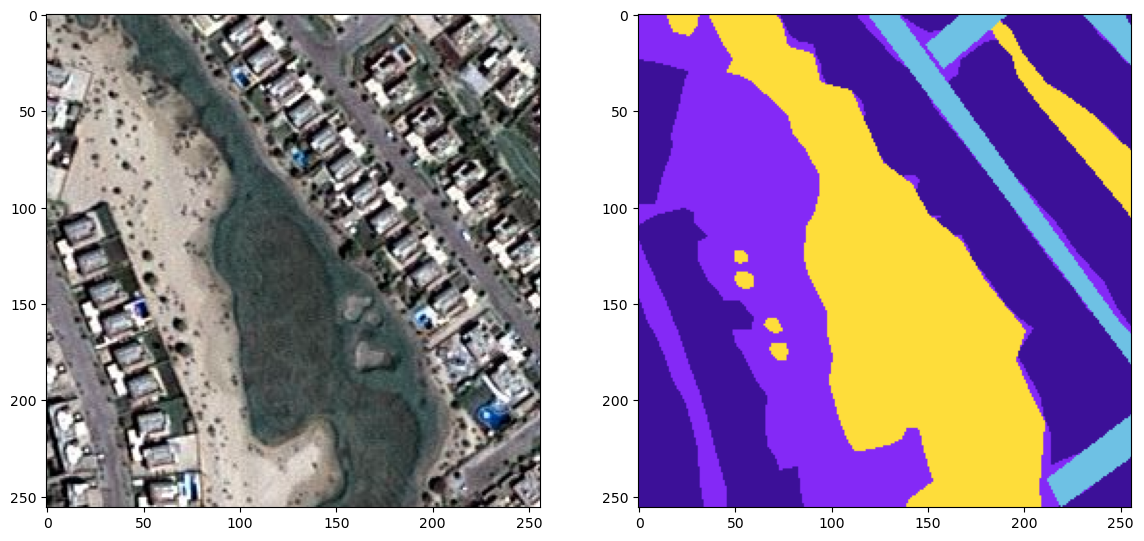

In [21]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])
     

In [22]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [23]:
label = individual_patched_mask

In [24]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [25]:
labels = []
for i in range(len(mask_dataset)):
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)
print(len(labels))

945


In [26]:
label = np.array(labels)
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [27]:
labels = np.expand_dims(labels, axis=3)
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [28]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [29]:
print("total unique labels based on masks:",format(np.unique(labels)))

total unique labels based on masks: [0 1 2 3 4 5]


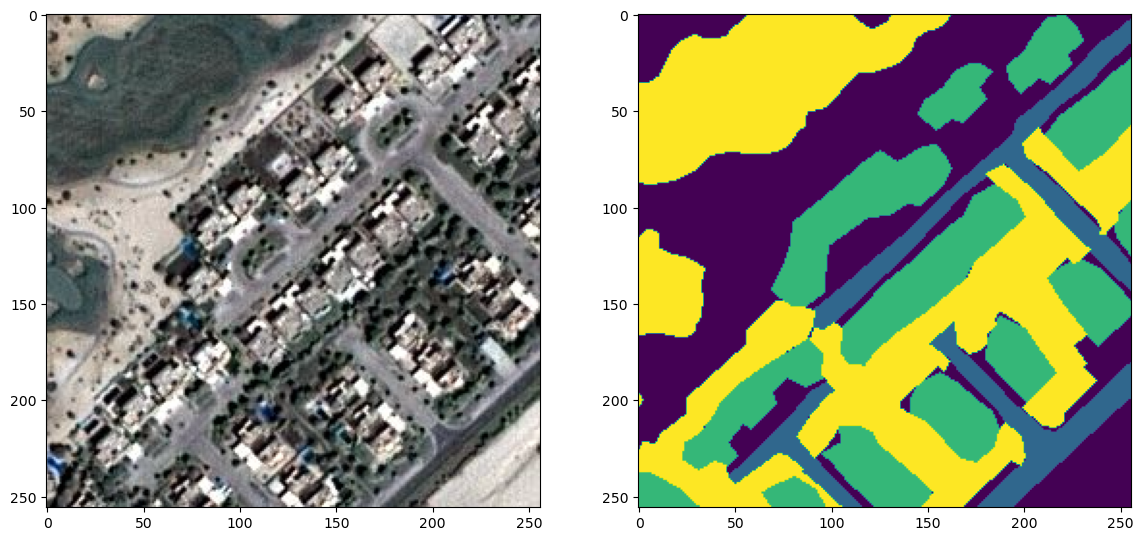

In [30]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [31]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [32]:
total_classes = len(np.unique(labels))
total_classes

6

In [33]:
!pip install tensorflow

In [34]:
%reset_selective -f tensorflow


In [35]:
!pip install --upgrade protobuf==3.20


  Obtaining dependency information for protobuf==3.20 from https://files.pythonhosted.org/packages/ae/80/9eaa62a2afcc5407a6b7d2652c208f073df3a5c83b5bff90bf99553fbcf2/protobuf-3.20.0-py2.py3-none-any.whl.metadata
  Using cached protobuf-3.20.0-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.0-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googleapis-common-protos 1.63.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
tensorflow-intel 2.16.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.0 which is incompatible.
tensorflow-metadata 1.15.0 requires protobuf<5,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.0 which is incompatible.


In [36]:
!pip install --upgrade tensorflow



  Obtaining dependency information for protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3 from https://files.pythonhosted.org/packages/ad/6e/1bed3b7c904cc178cb8ee8dbaf72934964452b3de95b7a63412591edb93c/protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl (413 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0


In [37]:
pip install --upgrade google-auth-oauthlib protobuf tensorflow-metadata ml-dtypes


  Obtaining dependency information for protobuf from https://files.pythonhosted.org/packages/8d/83/d70cb6fedb1f38318af01f0035f2103732630af0ca323c0198122b49323b/protobuf-5.26.1-cp310-abi3-win_amd64.whl.metadata
  Using cached protobuf-5.26.1-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Obtaining dependency information for ml-dtypes from https://files.pythonhosted.org/packages/f0/36/290745178e5776f7416818abc1334c1b19afb93c7c87fd1bef3cc99f84ca/ml_dtypes-0.4.0-cp311-cp311-win_amd64.whl.metadata
  Using cached ml_dtypes-0.4.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
Using cached ml_dtypes-0.4.0-cp311-cp311-win_amd64.whl (126 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.1
    Uninstalling ml-dtypes-0.3.1:
      Successfully uninstalled ml-dtypes-0.3.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.4.0 which is incompatible.


In [38]:
pip install --upgrade google-auth-oauthlib protobuf tensorflow-metadata ml-dtypes



  Obtaining dependency information for protobuf from https://files.pythonhosted.org/packages/8d/83/d70cb6fedb1f38318af01f0035f2103732630af0ca323c0198122b49323b/protobuf-5.26.1-cp310-abi3-win_amd64.whl.metadata
  Using cached protobuf-5.26.1-cp310-abi3-win_amd64.whl.metadata (592 bytes)


In [39]:
pip install --upgrade tensorflow


  Obtaining dependency information for ml-dtypes~=0.3.1 from https://files.pythonhosted.org/packages/a4/db/1784b87285588788170f87e987bfb4bda218d62a70a81ebb66c94e7f9b95/ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl (127 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install --upgrade ml-dtypes==0.2.0


  Obtaining dependency information for ml-dtypes==0.2.0 from https://files.pythonhosted.org/packages/08/89/c727fde1a3d12586e0b8c01abf53754707d76beaa9987640e70807d4545f/ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.


In [41]:
pip install --upgrade ml-dtypes==0.3.1


  Obtaining dependency information for ml-dtypes==0.3.1 from https://files.pythonhosted.org/packages/4f/95/48c66f80acb9f91c3c2fd0cc6939457b8b0c1bd0d2b96edb461a5209df80/ml_dtypes-0.3.1-cp311-cp311-win_amd64.whl.metadata
  Using cached ml_dtypes-0.3.1-cp311-cp311-win_amd64.whl.metadata (20 kB)
Using cached ml_dtypes-0.3.1-cp311-cp311-win_amd64.whl (127 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
Note: you may need to restart the kernel to use updated packages.


In [42]:
import tensorflow as tf

In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
labels_categorical_dataset = to_categorical(labels, num_classes = total_classes)
labels_categorical_dataset

array([[[[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0.

In [45]:
master_training_dataset = image_dataset

In [46]:
X_train,X_test,y_train,y_test = train_test_split(master_training_dataset,labels_categorical_dataset, test_size= 0.2,random_state=100)

In [47]:
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

In [48]:
#import numpy as np

# Convert list to NumPy array
'''
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

# Now you can access the shape attribute
image_height = X_train_array.shape[1]
image_width = X_train_array.shape[2]
image_channel = X_train_array.shape[3]

image_height1 = X_test_array.shape[1]
image_width1 = X_test_array.shape[2]
image_channel1 = X_test_array.shape[3]

image_height2 = y_train_array.shape[1]
image_width2 = y_train_array.shape[2]
image_channel2 = y_train_array.shape[3]

image_height3 = y_test_array.shape[1]
image_width3 = y_test_array.shape[2]
image_channel3 = y_test_array.shape[3]
'''

'\nX_train_array = np.array(X_train)\nX_test_array = np.array(X_test)\ny_train_array = np.array(y_train)\ny_test_array = np.array(y_test)\n\n# Now you can access the shape attribute\nimage_height = X_train_array.shape[1]\nimage_width = X_train_array.shape[2]\nimage_channel = X_train_array.shape[3]\n\nimage_height1 = X_test_array.shape[1]\nimage_width1 = X_test_array.shape[2]\nimage_channel1 = X_test_array.shape[3]\n\nimage_height2 = y_train_array.shape[1]\nimage_width2 = y_train_array.shape[2]\nimage_channel2 = y_train_array.shape[3]\n\nimage_height3 = y_test_array.shape[1]\nimage_width3 = y_test_array.shape[2]\nimage_channel3 = y_test_array.shape[3]\n'

In [49]:
import numpy as np

# Convert lists to NumPy arrays
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

# Print shapes
print("X_train shape:", X_train_array.shape)
print("X_test shape:", X_test_array.shape)
print("y_train shape:", y_train_array.shape)
print("y_test shape:", y_test_array.shape)

# Assign dimensions to variables
image_height_train, image_width_train, image_channel_train = X_train_array.shape[1:]
image_height_test, image_width_test, image_channel_test = X_test_array.shape[1:]
label_dimension = y_train_array.shape[1] if len(y_train_array.shape) > 1 else 1

# Print dimensions
print("Image dimensions for training data:")
print("Height:", image_height_train)
print("Width:", image_width_train)
print("Channel:", image_channel_train)
print("Label dimension:", label_dimension)

print("\nImage dimensions for testing data:")
print("Height:", image_height_test)
print("Width:", image_width_test)
print("Channel:", image_channel_test)


X_train shape: (756, 256, 256, 3)
X_test shape: (189, 256, 256, 3)
y_train shape: (756, 256, 256, 6)
y_test shape: (189, 256, 256, 6)
Image dimensions for training data:
Height: 256
Width: 256
Channel: 3
Label dimension: 256

Image dimensions for testing data:
Height: 256
Width: 256
Channel: 3


In [50]:
!pip install -U segmentation-models==0.2.1

  Obtaining dependency information for segmentation-models==0.2.1 from https://files.pythonhosted.org/packages/10/bf/253c8834014a834cacf2384c72872167fb30ccae7a56c6ce46285b03245c/segmentation_models-0.2.1-py2.py3-none-any.whl.metadata
  Using cached segmentation_models-0.2.1-py2.py3-none-any.whl.metadata (841 bytes)
  Obtaining dependency information for image-classifiers==0.2.0 from https://files.pythonhosted.org/packages/de/32/a1e74e03f74506d1e4b46bb2732ca5a7b18ac52a36b5e3547e63537ce74c/image_classifiers-0.2.0-py2.py3-none-any.whl.metadata
  Using cached image_classifiers-0.2.0-py2.py3-none-any.whl.metadata (8.3 kB)
Using cached segmentation_models-0.2.1-py2.py3-none-any.whl (44 kB)
Using cached image_classifiers-0.2.0-py2.py3-none-any.whl (76 kB)
  Attempting uninstall: image-classifiers
    Found existing installation: image-classifiers 1.0.0
    Uninstalling image-classifiers-1.0.0:
      Successfully uninstalled image-classifiers-1.0.0
  Attempting uninstall: segmentation-models
 

In [51]:
from keras.models import Model,Sequential
from keras.layers import Input,Conv2D,MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate,BatchNormalization,Dropout,Lambda
from keras.initializers import he_normal

In [52]:
from keras import backend as K

JACCARD FUNCTION

Measure used to compare the similarity and dissimilarity between sets. 

In [53]:
import tensorflow as tf

def jaccard_coef(y_true, y_pred):
    y_true_flat = tf.reshape(y_true, [-1])
    y_pred_flat = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat)
    union = tf.reduce_sum(y_true_flat) + tf.reduce_sum(y_pred_flat) - intersection
    final_coef_value = (intersection + 1.0) / (union + 1.0)
    return final_coef_value


Model Architecture and Deep-learning Network

In [54]:
def multi_unet_model(n_classes= 5 ,image_height= 256, image_width= 256, image_channel=1):
    inputs= Input((image_height,image_width,image_channel))
    source_input= inputs
    c1= Conv2D(16, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(source_input)
    c1= Dropout(0.2)(c1)
    c1= Conv2D(16, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(c1)
    p1= MaxPooling2D((2,2))(c1)
    
    c2= Conv2D(32, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(p1)
    c2= Dropout(0.2)(c2)
    c2= Conv2D(32, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(c2)
    p2= MaxPooling2D((2,2))(c2)
    
    c3= Conv2D(64, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(p2)
    c3= Dropout(0.2)(c3)
    c3= Conv2D(64, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(c3)
    p3= MaxPooling2D((2,2))(c3)
    
    c4= Conv2D(128, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(p3)
    c4= Dropout(0.2)(c4)
    c4= Conv2D(128, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(c4)
    p4= MaxPooling2D((2,2))(c4)
    
    c5= Conv2D(256, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(p4)
    c5= Dropout(0.2)(c5)
    c5= Conv2D(256, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(c5)
    
    u6= Conv2DTranspose(128, (2,2),strides = (2,2), padding= "same")(c5)
    u6= concatenate((u6,c4))
    c6= Conv2D(128, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(u6)
    c6= Dropout(0.2)(c6)
    c6= Conv2D(128, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(c6)
    
    u7= Conv2DTranspose(64, (2,2),strides = (2,2), padding= "same")(c6)
    u7= concatenate((u7,c3))
    c7= Conv2D(64, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(u7)
    c7= Dropout(0.2)(c7)
    c7= Conv2D(64, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(c7)
    
    u8= Conv2DTranspose(32, (2,2),strides = (2,2), padding= "same")(c7)
    u8= concatenate((u8,c2))
    c8= Conv2D(32, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(u8)
    c8= Dropout(0.2)(c8)
    c8= Conv2D(32, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(c8)
    
    u9= Conv2DTranspose(16, (2,2),strides = (2,2), padding= "same")(c8)
    u9= concatenate((u9,c1), axis= 3)
    c9= Conv2D(16, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(u9)
    c9= Dropout(0.2)(c9)
    c9= Conv2D(16, (3,3),activation= 'relu',kernel_initializer= "he_normal", padding= "same")(c9)
    
    #for classification softmax is the best activation function 
    outputs = Conv2D(n_classes, (1,1), activation='softmax')(c9)
    model = Model( inputs=[inputs], outputs = [outputs])
    return model

Model Metrics

In [55]:
metrics = ['accuracy',jaccard_coef]

In [56]:
def get_deep_learning_model():
    return multi_unet_model(n_classes=total_classes,
                            image_height= image_height_train,
                            image_width= image_width_train,
                            image_channel= image_channel_train)

In [57]:
model= get_deep_learning_model()

Generating Loss Function

Total Loss Function : Dice Loss +(1* Focal Loss)

It used to detect particular class using cross entropy loss independent of what the class distrubution is the mask data.

In [58]:
weights = [0.166,0.166,0.166,0.166,0.166,0.166]

In [59]:
pip install --upgrade segmentation-models tensorflow keras


  Obtaining dependency information for segmentation-models from https://files.pythonhosted.org/packages/da/b9/4a183518c21689a56b834eaaa45cad242d9ec09a4360b5b10139f23c63f4/segmentation_models-1.0.1-py3-none-any.whl.metadata
  Using cached segmentation_models-1.0.1-py3-none-any.whl.metadata (938 bytes)
  Obtaining dependency information for image-classifiers==1.0.0 from https://files.pythonhosted.org/packages/81/98/6f84720e299a4942ab80df5f76ab97b7828b24d1de5e9b2cbbe6073228b7/image_classifiers-1.0.0-py3-none-any.whl.metadata
  Using cached image_classifiers-1.0.0-py3-none-any.whl.metadata (8.6 kB)
Using cached segmentation_models-1.0.1-py3-none-any.whl (33 kB)
Using cached image_classifiers-1.0.0-py3-none-any.whl (19 kB)
  Attempting uninstall: image-classifiers
    Found existing installation: image-classifiers 0.2.0
    Uninstalling image-classifiers-0.2.0:
      Successfully uninstalled image-classifiers-0.2.0
  Attempting uninstall: segmentation-models
    Found existing installation:

In [60]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [61]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [62]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [63]:
total_loss = dice_loss + (1 * focal_loss)


# Model Compilation


In [64]:
import tensorflow as tf

In [65]:
tf.keras.backend.clear_session()

In [66]:
model.compile(optimizer="adam", loss= total_loss, metrics= metrics)

In [67]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 256, 256, 16)      │             448 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 256, 256, 16)      │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 256, 256, 16)      │           2,320 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 128, 128, 16)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 32)      │           4,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 128, 128, 32)      │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 32)      │           9,248 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 64, 64, 32)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64, 64, 64)        │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 64, 64, 64)        │          36,928 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 32, 32, 64)        │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 32, 32, 128)       │               0 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 32, 32, 128)       │         147,584 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
import numpy as np

# Convert lists to NumPy arrays
X_train_aligned = np.array(X_train_aligned)
y_train_aligned = np.array(y_train_aligned)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print the shapes to verify
print("X_train_aligned shape:", X_train_aligned.shape)
print("y_train_aligned shape:", y_train_aligned.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train_aligned shape: (756, 256, 256, 3)
y_train_aligned shape: (756, 256, 256, 6)
X_test shape: (189, 256, 256, 3)
y_test shape: (189, 256, 256, 6)


In [72]:
import numpy as np
from sklearn.utils import shuffle

# Shuffle both X_train and y_train simultaneously
X_train, y_train = shuffle(X_train, y_train)

min_samples = min(len(X_train), len(y_train))
X_train_aligned = X_train[:min_samples]
y_train_aligned = y_train[:min_samples]

# Convert to numpy arrays
X_train_aligned = np.array(X_train_aligned)
y_train_aligned = np.array(y_train_aligned)

# Print the shapes to verify
print("X_train_aligned shape:", X_train_aligned.shape)
print("y_train_aligned shape:", y_train_aligned.shape)


X_train_aligned shape: (756, 256, 256, 3)
y_train_aligned shape: (756, 256, 256, 6)


In [73]:
from tensorflow.keras.callbacks import EarlyStopping

# Normalize the input images
X_train_normalized = X_train_aligned / 255.0
X_test_normalized = X_test / 255.0

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with data normalization and early stopping
model_history = model.fit(X_train_normalized, y_train_aligned,
                           batch_size=16,
                           verbose=1,
                           epochs=150,
                           validation_data=(X_test_normalized, y_test),
                           shuffle=False,
                           callbacks=[early_stopping])


Epoch 1/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.4869 - jaccard_coef: 0.1569 - loss: 1.0177 - val_accuracy: 0.5303 - val_jaccard_coef: 0.1531 - val_loss: 1.0090
Epoch 2/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.5956 - jaccard_coef: 0.3147 - loss: 0.9934 - val_accuracy: 0.6519 - val_jaccard_coef: 0.3007 - val_loss: 0.9816
Epoch 3/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.6850 - jaccard_coef: 0.3679 - loss: 0.9768 - val_accuracy: 0.6463 - val_jaccard_coef: 0.3271 - val_loss: 0.9819
Epoch 4/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.6910 - jaccard_coef: 0.3931 - loss: 0.9723 - val_accuracy: 0.6730 - val_jaccard_coef: 0.3791 - val_loss: 0.9698
Epoch 5/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.6888 - jaccard_coef: 0.3908 - loss: 0.9724 - val_accuracy: 0.6801 - val_jaccard_coef: 0.3652 - val_loss: 0.9691
Epoch 6/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.7021 - jaccard_coef: 0.4077 - loss: 0.9676 -

In [74]:
history_a = model_history

In [75]:
history_a.history

{'accuracy': [0.5480831861495972,
  0.6346492171287537,
  0.6806806921958923,
  0.6871104836463928,
  0.6836021542549133,
  0.6989206671714783,
  0.6982423663139343,
  0.6981003284454346,
  0.7023076415061951,
  0.7002196311950684,
  0.7067604660987854,
  0.7086168527603149,
  0.7160178422927856,
  0.7185145616531372,
  0.7298569679260254,
  0.7390569448471069,
  0.7425127029418945,
  0.7493522763252258,
  0.7589759826660156,
  0.7674902677536011,
  0.7657569050788879,
  0.7715756297111511],
 'jaccard_coef': [0.21126903593540192,
  0.32818958163261414,
  0.3610222339630127,
  0.3881721496582031,
  0.3791674077510834,
  0.4075544774532318,
  0.4125351905822754,
  0.41843751072883606,
  0.4296681582927704,
  0.4507776200771332,
  0.441129595041275,
  0.4656747281551361,
  0.4718632996082306,
  0.47684791684150696,
  0.49907803535461426,
  0.5085786581039429,
  0.5143303275108337,
  0.5191017985343933,
  0.5353158116340637,
  0.5485135912895203,
  0.5469057559967041,
  0.5518515110015869]

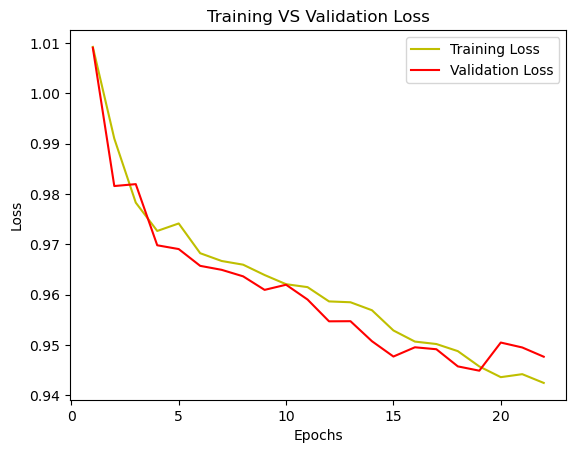

In [76]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label ='Training Loss')
plt.plot(epochs,val_loss,'r',label ='Validation Loss')
plt.title('Training VS Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

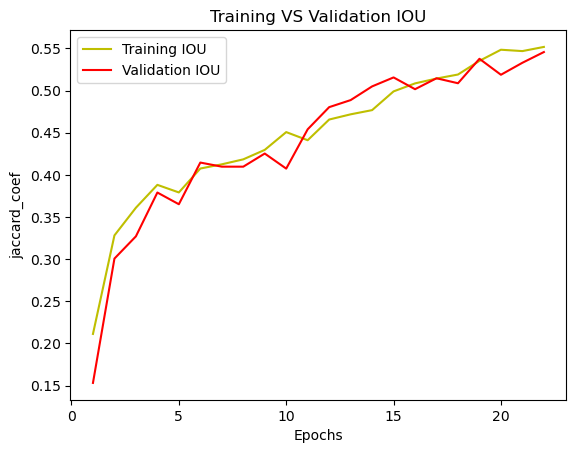

In [77]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']
epochs = range(1,len(jaccard_coef)+1)
plt.plot(epochs,jaccard_coef,'y',label ='Training IOU')
plt.plot(epochs,val_jaccard_coef,'r',label ='Validation IOU')
plt.title('Training VS Validation IOU')
plt.xlabel("Epochs")
plt.ylabel("jaccard_coef")
plt.legend()
plt.show()

In [78]:
model_history.params


{'verbose': 1, 'epochs': 150, 'steps': 48}

In [79]:
'''from tensorflow.keras.callbacks import EarlyStopping

# Normalize the input images
X_train_normalized = X_train_aligned / 255.0
X_test_normalized = X_test / 255.0

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with data normalization and early stopping
model_history = model.fit(X_train_normalized, y_train_aligned,
                           batch_size=16,
                           verbose=1,
                           epochs=5,
                           validation_data=(X_test_normalized, y_test),
                           shuffle=False,
                           callbacks=[early_stopping])'''

"from tensorflow.keras.callbacks import EarlyStopping\n\n# Normalize the input images\nX_train_normalized = X_train_aligned / 255.0\nX_test_normalized = X_test / 255.0\n\n# Define the early stopping callback\nearly_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)\n\n# Train the model with data normalization and early stopping\nmodel_history = model.fit(X_train_normalized, y_train_aligned,\n                           batch_size=16,\n                           verbose=1,\n                           epochs=5,\n                           validation_data=(X_test_normalized, y_test),\n                           shuffle=False,\n                           callbacks=[early_stopping])"

In [80]:
y_pred =  model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


In [81]:
len(y_pred)

189

In [82]:
y_pred_argmax = np.argmax(y_pred,axis=3)

In [83]:
len(y_pred_argmax)

189

In [84]:
y_pred_argmax

array([[[1, 3, 3, ..., 3, 3, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 1],
        [3, 3, 3, ..., 3, 3, 1],
        [3, 3, 3, ..., 3, 3, 1]],

       [[1, 3, 3, ..., 3, 3, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 1],
        [1, 1, 1, ..., 3, 3, 1]],

       [[1, 3, 3, ..., 3, 3, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [1, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 1]],

       ...,

       [[1, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 1],
        [3, 3, 3, ..., 3, 3, 1],
        ...,
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 1],
        [1, 1, 1, ..., 3, 3, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 3, 3, 1],
        [1, 1, 1, ..., 3, 3, 1],
        ...,
        [1, 1, 1, ..., 

In [85]:
y_test_argmax = np.argmax(y_test,axis=3)

In [86]:
len(y_test_argmax)

189

In [87]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [2, 2, 2, ..., 

In [88]:
import random

In [101]:
test_image_number =random.randint(0,len(X_test))
test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image,0)

prediction = model.predict(test_image_input)

predicted_image=np.argmax(prediction,axis=3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [102]:
predicted_image = predicted_image[0,:,:]
predicted_image

array([[1, 3, 3, ..., 3, 3, 1],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 1]], dtype=int64)

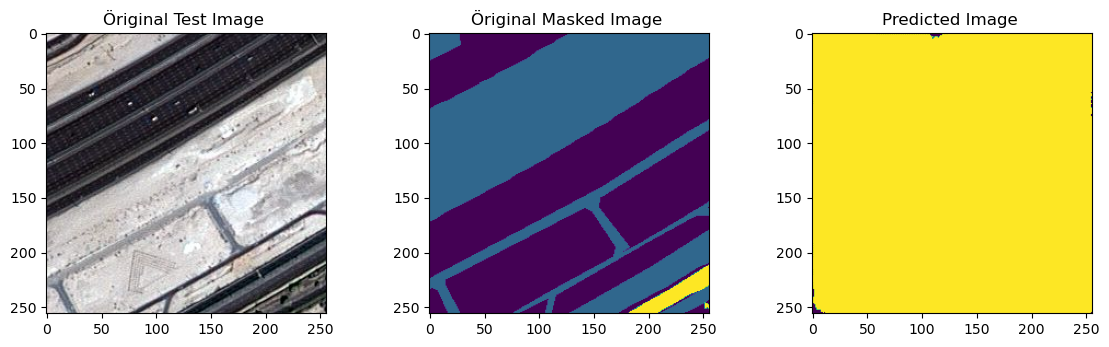

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Öriginal Test Image ")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Öriginal Masked Image ")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image ")
plt.imshow(predicted_image)